In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
import sklearn.model_selection

Эвристики с датасетами

In [2]:
data = pd.read_csv('train.csv', index_col='id')
data_test = pd.read_csv('test.csv', index_col='id')
print(data_test.date.unique())
print(data.date.unique())

['2012-3' '2012-4' '2012-5' '2012-6' '2012-7' '2012-8' '2012-9' '2013-1'
 '2013-10' '2013-11' '2013-12' '2013-2' '2013-3' '2013-4' '2013-5' '2013-6'
 '2013-7' '2013-8' '2013-9']
['2011-1' '2011-10' '2011-11' '2011-12' '2011-2' '2011-3' '2011-4' '2011-5'
 '2011-6' '2011-7' '2011-8' '2011-9' '2012-1' '2012-10' '2012-11' '2012-12'
 '2012-2' '2012-3']


In [3]:
data['floor1'] = 0
data.loc[data['floor'] == 1,'floor1'] = 1
data['floor2-5'] = 0
data.loc[(data['floor'] >=2) & (data['floor'] <= 5), 'floor2-5'] = data['floor']
data['floor6andmore'] = 0
data.loc[data['floor'] > 5, 'floor6andmore'] = 1
data = data.drop(['floor'], axis = 1)

data_test['floor1'] = 0
data_test.loc[data_test['floor'] == 1,'floor1'] = 1
data_test['floor2-5'] = 0
data_test.loc[(data_test['floor'] >=2) & (data_test['floor'] <= 5), 'floor2-5'] = data_test['floor']
data_test['floor6andmore'] = 0
data_test.loc[data_test['floor'] > 5, 'floor6andmore'] = 1
data_test = data_test.drop(['floor'], axis = 1)


In [4]:
data['year'] = data['date'].str.split('-').str.get(0)
data['month'] = data['date'].str.split('-').str.get(1)
data['year'] = data['year'].astype(np.int)
data['month'] = data['month'].astype(np.int)
data['date'] = (data['year'] - 2011) * 12 + data['month']
#добавляем время года
data = data.drop(['year', 'month'], axis=1)

data_test['year'] = data_test['date'].str.split('-').str.get(0)
data_test['month'] = data_test['date'].str.split('-').str.get(1)
data_test['year'] = data_test['year'].astype(np.int)
data_test['month'] = data_test['month'].astype(np.int)
data_test['date'] = (data_test['year'] - 2011) * 12 + data_test['month']
#время года
data_test = data_test.drop(['year', 'month'], axis=1)
data

,date,street_id,build_tech,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw8,kw9,kw10,kw11,kw12,kw13,price,floor1,floor2-5,floor6andmore
id,,,,,,,,,,,,,,,,,,,,,
0,1,121,1.0,52,2,1,30.0,0.0,2,0,...,0,0,0,0,0,0,3090000,0,3,0
1,1,58,1.0,101,3,1,5.0,NaN,1,0,...,0,0,0,0,0,0,15372000,0,0,1
2,1,530,0.0,71,3,0,30.0,NaN,8,0,...,0,0,0,0,0,0,10067000,0,0,1
3,1,448,NaN,36,1,1,15.0,0.0,0,0,...,0,0,0,0,0,0,3159000,0,5,0
4,1,404,2.0,215,6,2,20.0,1.0,2,0,...,0,0,0,0,0,0,13816000,0,3,0
5,1,443,1.0,52,2,1,25.0,1.0,2,0,...,0,0,0,0,0,0,5473000,0,3,0
6,1,452,0.0,59,3,0,30.0,0.0,2,0,...,0,0,0,0,0,0,3760000,0,5,0
7,1,25,0.0,38,1,0,30.0,NaN,0,0,...,0,0,0,0,0,0,1000000,0,0,1
8,1,193,1.0,52,2,1,30.0,1.0,7,0,...,0,0,0,0,0,0,4843000,0,0,1


In [5]:
data.corr()

,date,street_id,build_tech,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw8,kw9,kw10,kw11,kw12,kw13,price,floor1,floor2-5,floor6andmore
date,1.000000,-0.003706,0.002388,0.000488,-0.002480,0.003026,0.001763,0.000751,0.003903,1.858698e-03,...,-0.005935,0.001764,0.004100,0.002485,-0.005289,0.003461,0.092216,-0.000705,0.000538,0.000040
street_id,-0.003706,1.000000,-0.020805,-0.011805,-0.004989,-0.015962,-0.005452,0.000263,0.009559,-2.194681e-03,...,-0.005432,0.000703,-0.003302,-0.002637,-0.000029,-0.002407,-0.019526,-0.003186,0.002628,-0.001246
build_tech,0.002388,-0.020805,1.000000,0.329191,0.121412,0.779292,0.011332,-0.003799,0.021555,3.657142e-03,...,0.072058,0.072759,0.033455,0.013813,0.097010,0.035743,0.363164,-0.034367,-0.067283,0.103509
area,0.000488,-0.011805,0.329191,1.000000,0.794062,0.252904,0.012006,0.002189,0.166720,-5.692323e-04,...,-0.004444,0.000177,0.101162,0.040557,0.029592,0.047481,0.650134,-0.043975,-0.100286,0.146426
rooms,-0.002480,-0.004989,0.121412,0.794062,1.000000,0.094176,0.004007,-0.000083,0.207500,-2.133243e-03,...,0.005664,0.013897,0.032219,0.011906,-0.002579,0.015132,0.354018,-0.007111,-0.003760,0.009195
balcon,0.003026,-0.015962,0.779292,0.252904,0.094176,1.000000,0.009456,-0.002896,0.019968,5.070562e-03,...,0.057093,0.055931,0.028477,0.016332,0.080411,0.025874,0.280250,-0.023291,-0.049850,0.075722
metro_dist,0.001763,-0.005452,0.011332,0.012006,0.004007,0.009456,1.000000,-0.002434,0.001755,2.543450e-03,...,-0.000641,0.000706,0.001051,-0.005173,0.002843,0.000348,-0.099835,-0.003248,0.001125,0.002113
g_lift,0.000751,0.000263,-0.003799,0.002189,-0.000083,-0.002896,-0.002434,1.000000,0.001163,4.723605e-03,...,0.004976,-0.004474,0.002595,0.000903,-0.000587,0.001855,0.003908,-0.003200,-0.004752,0.006661
n_photos,0.003903,0.009559,0.021555,0.166720,0.207500,0.019968,0.001755,0.001163,1.000000,3.896114e-02,...,0.007580,0.014123,0.010500,0.005760,0.003252,0.005698,0.176104,-0.000168,-0.005073,0.006583
kw1,0.001859,-0.002195,0.003657,-0.000569,-0.002133,0.005071,0.002543,0.004724,0.038961,1.000000e+00,...,0.001317,0.000457,-0.004267,0.000916,-0.001183,-0.000712,0.015781,0.006050,-0.000321,-0.002277


попробуем предсказать случайным лесом buildtech

In [6]:
preddata = data[~data['build_tech'].isnull()]
preddata = preddata[~data['g_lift'].isnull()]
preddata = preddata[~data['metro_dist'].isnull()]

preddata_test = data_test[~data_test['build_tech'].isnull()]
preddata_test = preddata_test[~data_test['g_lift'].isnull()]
preddata_test = preddata_test[~data_test['metro_dist'].isnull()]

preddata_test.isnull().any()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


date             False
street_id        False
build_tech       False
area             False
rooms            False
balcon           False
metro_dist       False
g_lift           False
n_photos         False
kw1              False
kw2              False
kw3              False
kw4              False
kw5              False
kw6              False
kw7              False
kw8              False
kw9              False
kw10             False
kw11             False
kw12             False
kw13             False
floor1           False
floor2-5         False
floor6andmore    False
dtype: bool

Дальше предсказываем по прецедентам не имеющим NaN наши признаки

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = preddata.drop(['build_tech', 'metro_dist', 'g_lift', 'price', 'date'], axis=1)
y = preddata['build_tech']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
X = data.drop(['build_tech', 'metro_dist', 'g_lift', 'price', 'date'], axis=1)
build_tech = rf.predict(X)

#то же самое для тестовой выборки

X_test = data_test.drop(['build_tech', 'metro_dist', 'g_lift', 'date'], axis=1)
build_tech_test = rf.predict(X_test)
build_tech_test


array([ 1.,  1.,  0., ...,  0.,  1.,  0.])

In [9]:
from sklearn.metrics import accuracy_score as acc
print("accuracy of build_tech prediction=", acc(y_test, y_pred))

accuracy of build_tech prediction= 0.922184567258


In [10]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(n_estimators = 500, n_jobs=-1)
X = preddata.drop(['build_tech', 'metro_dist', 'g_lift', 'price', 'date'], axis=1)
y = preddata['metro_dist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
rf_regr.fit(X_train, y_train)
y_pred = rf_regr.predict(X_test)
X = data.drop(['build_tech', 'metro_dist', 'g_lift', 'price', 'date'], axis=1)
metro_dist = rf_regr.predict(X)
#то же самое для тестовой выборки

X_test = data_test.drop(['build_tech', 'metro_dist', 'g_lift', 'date'], axis=1)
metro_dist_test = rf_regr.predict(X_test)
metro_dist_test

array([ 26.01      ,  15.46      ,  28.88333333, ...,  21.32666667,
        16.7025    ,  22.17      ])

In [11]:
from sklearn.metrics import mean_squared_error as mse
print("mse of metro_dist prediction=", mse(y_test, y_pred))
print("mean error value=", (abs(y_test-y_pred).mean()))

mse of metro_dist prediction= 52.6803884202
mean error value= 5.892420517766113


In [12]:
from sklearn.svm import SVC
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = preddata.drop(['build_tech', 'metro_dist', 'g_lift', 'price', 'date'], axis=1)
y = preddata['g_lift']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
X = data.drop(['build_tech', 'metro_dist', 'g_lift', 'price', 'date'], axis=1)
g_lift = rf.predict(X)

X_test = data_test.drop(['build_tech', 'metro_dist', 'g_lift', 'date'], axis=1)
g_lift_test = rf.predict(X_test)
g_lift_test

array([ 1.,  1.,  0., ...,  1.,  0.,  0.])

In [13]:
print("accuracy of g_lift prediction=", acc(y_test, y_pred))

accuracy of g_lift prediction= 0.496350364964


g_lift не получается предсказать прям ваще никак. давайте попробуем заполнить его максимально встречающимся числом

In [14]:
data.loc[data['build_tech'].isnull(), 'build_tech'] = build_tech[data['build_tech'].isnull()]
data.loc[data['metro_dist'].isnull(), 'metro_dist'] = metro_dist[data['metro_dist'].isnull()]
data.loc[data['g_lift'].isnull(), 'g_lift'] = 0 #то, что чаще встречается (лифта нет)

data_test.loc[data_test['build_tech'].isnull(), 'build_tech'] = build_tech_test[data_test['build_tech'].isnull()]
data_test.loc[data_test['metro_dist'].isnull(), 'metro_dist'] = metro_dist_test[data_test['metro_dist'].isnull()]
data_test.loc[data_test['g_lift'].isnull(), 'g_lift'] = 0 #то, что чаще встречается (лифта нет)

data.describe()

,date,street_id,build_tech,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw8,kw9,kw10,kw11,kw12,kw13,price,floor1,floor2-5,floor6andmore
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,10.451300,334.506830,0.53464,52.108100,2.11278,0.402810,21.787371,0.348150,2.480110,0.056540,...,0.00801,0.008320,0.001800,0.000290,0.001420,0.000220,5.329125e+06,0.127760,1.832380,0.347550
std,6.833441,194.178711,0.57774,17.433424,0.82522,0.550869,8.217724,0.476386,1.945282,0.230963,...,0.08914,0.090834,0.042388,0.017027,0.037656,0.014831,4.669177e+06,0.333824,1.922805,0.476195
min,1.000000,0.000000,0.00000,29.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.940000e+05,0.000000,0.000000,0.000000
25%,5.000000,165.000000,0.00000,40.000000,1.00000,0.000000,15.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.673000e+06,0.000000,0.000000,0.000000
50%,9.000000,334.000000,0.00000,52.000000,2.00000,0.000000,25.000000,0.000000,2.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.169500e+06,0.000000,2.000000,0.000000
75%,14.000000,503.000000,1.00000,60.000000,3.00000,1.000000,30.000000,1.000000,4.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.414000e+06,0.000000,4.000000,1.000000
max,24.000000,671.000000,2.00000,217.000000,6.00000,2.000000,30.000000,1.000000,11.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.104980e+08,1.000000,5.000000,1.000000


In [19]:
#n_photos > 10 - дофига, поэтому берём их равными 10 и и к [0, 1]
#ну и посчитаем балкон * лифт, ремонт * балкон, ремонт * лифт

data.loc[data['n_photos'] > 10, 'n_photos'] = 10
data.loc[:, 'n_photos'] = (data.loc[:, 'n_photos'] - data.loc[:, 'n_photos'].min())/(data.loc[:, 'n_photos'].max() - data.loc[:, 'n_photos'].min())
data['balcon*g_lift'] = data['balcon'] * data['g_lift']
data['build_tech*balcon'] = data['build_tech'] * data['balcon']
data['build_tech*g_lift'] = data['build_tech'] * data['g_lift']
data['area/metro_dist'] = data['area'] / (1 + data['metro_dist'])
data['n_photos/rooms'] = data['n_photos'] / (1 + data['rooms'])
data['area / n_photos'] = data['area'] / (1 + data['n_photos'])

data_test.loc[data_test['n_photos'] > 10, 'n_photos'] = 10
data_test.loc[:, 'n_photos'] = (data_test.loc[:, 'n_photos'] - data_test.loc[:, 'n_photos'].min())/(data_test.loc[:, 'n_photos'].max() - data_test.loc[:, 'n_photos'].min())
data_test['balcon*g_lift'] = data_test['balcon'] * data_test['g_lift']
data_test['build_tech*balcon'] = data_test['build_tech'] * data_test['balcon']
data_test['build_tech*g_lift'] = data_test['build_tech'] * data_test['g_lift']
data_test['area/metro_dist'] = data_test['area'] / (1 + data_test['metro_dist'])
data_test['n_photos/rooms'] = data_test['n_photos'] / (1 + data_test['rooms'])
data_test['area / n_photos'] = data_test['area'] / (1 + data_test['n_photos'])

data.describe()

,date,build_tech,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,...,floor6andmore,balcon*g_lift,build_tech*balcon,build_tech*g_lift,area/metro_dist,n_photos/rooms,meterprice,easyprice,street,area / n_photos
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,10.451300,0.53464,52.108100,2.11278,0.402810,21.787371,0.348150,0.248008,0.056540,0.628840,...,0.347550,0.139060,0.465710,0.18501,3.400252,0.082158,86282.874290,4.582473e+06,335.977840,42.410925
std,6.833441,0.57774,17.433424,0.82522,0.550869,8.217724,0.476386,0.194516,0.230963,0.483118,...,0.476195,0.376117,0.791347,0.42382,6.119575,0.065263,41784.000969,3.156356e+06,193.805658,14.601779
min,1.000000,0.00000,29.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.935484,0.000000,21361.568653,6.622086e+05,-0.000000,17.647059
25%,5.000000,0.00000,40.000000,1.00000,0.000000,15.000000,0.000000,0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.666667,0.033333,56043.145422,2.677610e+06,168.000000,33.000000
50%,9.000000,0.00000,52.000000,2.00000,0.000000,25.000000,0.000000,0.200000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,2.083333,0.075000,77765.740831,3.834129e+06,337.000000,40.000000
75%,14.000000,1.00000,60.000000,3.00000,1.000000,30.000000,1.000000,0.400000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.00000,3.181818,0.125000,104450.824781,5.457715e+06,504.000000,49.090909
max,24.000000,2.00000,217.000000,6.00000,2.000000,30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,4.000000,2.00000,183.000000,0.400000,349439.359976,7.512946e+07,671.000000,196.363636


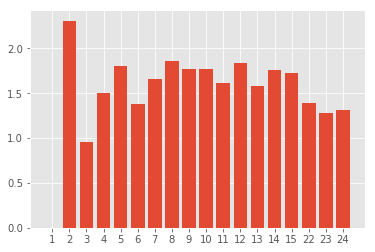

среднее значение инфляции по всей тренировочной выборке 1.61931718484


In [20]:
avgpricetime = {}

for i in sorted(data['date'].value_counts().index):
    avgpricetime[i] = (data.loc[data['date'] == i, 'price'].mean() / data.loc[data['date'] == i, 'area'].mean())
#считаем инфляцую в процентах от пред. месяца
avgpriceinflation = [0]
month = sorted(avgpricetime.keys())

for i in range(1, len(month)):
    avgpriceinflation.append((avgpricetime[month[i]] / avgpricetime[month[0]] - 1) * 100 / (month[i] - month[0]))
    

plt.bar(range(1, len(avgpriceinflation)+1), avgpriceinflation, align='center')
plt.xticks(range(1, len(avgpriceinflation)+1), month)
plt.show()
print("среднее значение инфляции по всей тренировочной выборке", np.array(avgpriceinflation[1:]).mean())

In [17]:
X = data.drop(['price'], axis = 1)
y = data[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
avgpricetime = {}


for i in sorted(X_train['date'].value_counts().index):
    avgpricetime[i] = (y_train.loc[X_train['date'] == i, 'price'].mean() / X_train.loc[X_train['date'] == i, 'area'].mean())
#считаем инфляцую в процентах от пред. месяца
avgpriceinflation = [0]
month = sorted(avgpricetime.keys())
for i in range(1, len(month)):
    avgpriceinflation.append((avgpricetime[month[i]] / avgpricetime[month[0]] - 1) * 100 / (month[i] - month[0]))

print("среднее значение инфляции по тренировочной выборке", np.array(avgpriceinflation[1:]).mean())
inflation = np.array(avgpriceinflation[1:]).mean() / 100

среднее значение инфляции по тренировочной выборке 1.56878406585


In [18]:
onemeterprice = {}
y = data[['date', 'price']]
y['price'] = y['price'] / (1 + inflation*y['date'])
y = y.drop(['date'], axis = 1)
for i in range(len(data['street_id'].unique())):
    onemeterprice[i] = y.loc[data['street_id'] == i, 'price'].mean(axis=0) / data.loc[data['street_id'] == i, 'area'].mean(axis=0)

data['meterprice'] = 0.0
data_test['meterprice'] = 0.0

for i in range(len(data['street_id'].unique())):
    val = onemeterprice[i]
    data['meterprice'][data['street_id']==i] = val
    data_test['meterprice'][data_test['street_id']==i] = val
    #print(onemeterprice[i])
data['easyprice'] = data['meterprice'] * data['area']
data_test['easyprice'] = data_test['meterprice']* data_test['area']
#дальше нормируем улицы от 0 до 671 в соответствии с нашим

sorted_street_id= sorted(onemeterprice.items(), key = lambda x: x[1])
for i in range(len(sorted_street_id)):
    #улица лежит в 0 элементе
    data.loc[data['street_id'] == sorted_street_id[i][0],'street'] = -i
    data_test.loc[data_test['street_id'] == sorted_street_id[i][0], 'street'] = -i
data['street'] = -data['street']
data_test['street'] = -data_test['street']

data=data.drop(['street_id'], axis=1)
data_test=data_test.drop(['street_id'], axis=1)
#отсортировали улицы по возрастанию понтовости
data

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,build_tech,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,...,floor2-5,floor6andmore,balcon*g_lift,build_tech*balcon,build_tech*g_lift,area/metro_dist,n_photos/rooms,meterprice,easyprice,street
id,,,,,,,,,,,,,,,,,,,,,
0,1,1.0,52,2,1,30.00,0.0,0.2,0,1,...,3,0,0.0,1.0,0.0,1.677419,0.066667,54797.319499,2.849461e+06,148.0
1,1,1.0,101,3,1,5.00,0.0,0.1,0,0,...,0,1,0.0,1.0,0.0,16.833333,0.025000,101090.064014,1.021010e+07,486.0
2,1,0.0,71,3,0,30.00,0.0,0.8,0,1,...,0,1,0.0,0.0,0.0,2.290323,0.200000,139327.448390,9.892249e+06,609.0
3,1,1.0,36,1,1,15.00,0.0,0.0,0,1,...,5,0,0.0,1.0,0.0,2.250000,0.000000,77361.056925,2.784998e+06,332.0
4,1,2.0,215,6,2,20.00,1.0,0.2,0,0,...,3,0,2.0,4.0,2.0,10.238095,0.028571,69515.723483,1.494588e+07,260.0
5,1,1.0,52,2,1,25.00,1.0,0.2,0,1,...,3,0,1.0,1.0,1.0,2.000000,0.066667,78520.171204,4.083049e+06,343.0
6,1,0.0,59,3,0,30.00,0.0,0.2,0,1,...,5,0,0.0,0.0,0.0,1.903226,0.050000,66299.404204,3.911665e+06,229.0
7,1,0.0,38,1,0,30.00,0.0,0.0,0,1,...,0,1,0.0,0.0,0.0,1.225806,0.000000,195639.482985,7.434300e+06,655.0
8,1,1.0,52,2,1,30.00,1.0,0.7,0,0,...,0,1,1.0,1.0,1.0,1.677419,0.233333,80209.635947,4.170901e+06,360.0


In [22]:
for i in range(1, 14):
    #kw1 - kw13 перемножаем
    for j in range(i+1, 14):
        data['kw'+str(i)+'kw'+str(j)] = data['kw'+str(i)]*data['kw'+str(j)]
        data_test['kw'+str(i)+'kw'+str(j)] = data_test['kw'+str(i)]*data_test['kw'+str(j)]

In [23]:
for i in data.columns:
    if np.sum(data[i] != 0) < data.shape[0] * 0.0001:
        #если меньше 1 сотой процента (10 прецедентов) отличны от нуля - нам нафик не сдался этот признак
        print(np.sum(data[i] != 0))
        data = data.drop([i], axis=1)
        data_test = data_test.drop([i], axis=1)
        print("constant: ",  i)


7
constant:  kw1kw6
4
constant:  kw1kw7
6
constant:  kw1kw10
2
constant:  kw1kw11
7
constant:  kw1kw12
1
constant:  kw1kw13
3
constant:  kw2kw11
1
constant:  kw2kw13
0
constant:  kw3kw4
0
constant:  kw3kw5
0
constant:  kw3kw6
0
constant:  kw3kw7
0
constant:  kw3kw8
0
constant:  kw3kw9
0
constant:  kw3kw10
0
constant:  kw3kw11
0
constant:  kw3kw12
0
constant:  kw3kw13
0
constant:  kw4kw5
0
constant:  kw4kw6
0
constant:  kw4kw7
0
constant:  kw4kw8
0
constant:  kw4kw9
0
constant:  kw4kw10
0
constant:  kw4kw11
0
constant:  kw4kw12
0
constant:  kw4kw13
0
constant:  kw5kw6
0
constant:  kw5kw7
0
constant:  kw5kw8
0
constant:  kw5kw9
0
constant:  kw5kw10
0
constant:  kw5kw11
0
constant:  kw5kw12
0
constant:  kw5kw13
0
constant:  kw6kw7
0
constant:  kw6kw8
0
constant:  kw6kw9
0
constant:  kw6kw10
0
constant:  kw6kw11
0
constant:  kw6kw12
0
constant:  kw6kw13
0
constant:  kw7kw8
0
constant:  kw7kw9
0
constant:  kw7kw10
0
constant:  kw7kw11
0
constant:  kw7kw12
0
constant:  kw7kw13
0
constant:  k

In [52]:
def my_train_test_split(X, y, test_size = 0.5):
     return X[:int((1-test_size)*X.shape[0])], X[int((1-test_size)*X.shape[0]):], y[:int((1-test_size)*X.shape[0])], y[int((1-test_size)*X.shape[0]):]
data.loc[:, (data.columns!='date') & (data.columns!='price') ]

,build_tech,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,...,kw2kw3,kw2kw4,kw2kw5,kw2kw6,kw2kw7,kw2kw8,kw2kw9,kw2kw10,kw2kw12,corprice
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,52,2,1,30.00,0.0,0.2,0,1,0,...,0,0,0,0,0,0,0,0,0,3.495798e+06
1,1.0,101,3,1,5.00,0.0,0.1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.269828e+07
2,0.0,71,3,0,30.00,0.0,0.8,0,1,0,...,0,0,0,0,0,0,0,0,0,9.733652e+06
3,1.0,36,1,1,15.00,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.195719e+06
4,2.0,215,6,2,20.00,1.0,0.2,0,0,0,...,0,0,0,0,0,0,0,0,0,2.193832e+07
5,1.0,52,2,1,25.00,1.0,0.2,0,1,0,...,0,0,0,0,0,0,0,0,0,4.522403e+06
6,0.0,59,3,0,30.00,0.0,0.2,0,1,0,...,0,0,0,0,0,0,0,0,0,3.000160e+06
7,0.0,38,1,0,30.00,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,7.204842e+06
8,1.0,52,2,1,30.00,1.0,0.7,0,0,0,...,0,0,0,0,0,0,0,0,0,4.766164e+06


In [53]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
def stack_pred(estimator, X, y, Xt, k=3, method='predict'):
    kf = sklearn.model_selection.KFold(n_splits=k, shuffle=False, random_state=1)
    sX = np.zeros(y.size)
    sXt = np.zeros(Xt.shape[0])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        estimator.fit(X_train, y_train)
        sX[test_index] = estimator.predict(X_test)
        sXt = sXt + estimator.predict(Xt)
    sXt = sXt / k
    return sX, sXt

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
rf = RandomForestRegressor(n_estimators = 500, n_jobs=-1, max_features = 15, random_state=0)
gb = GradientBoostingRegressor(loss='lad', learning_rate = 0.02, n_estimators = 500)
el = ElasticNet(alpha=1.0, l1_ratio=1,normalize=True, random_state=0)
data['corprice'], data_test['corprice'] = stack_pred(regr, data[['street', 'floor1', 'floor2-5', 'floor6andmore', 'easyprice', 'build_tech', 'area', 'rooms', 'balcon']], data['price'] / (1 + inflation*data['date']), data_test[['street', 'floor1', 'floor2-5', 'floor6andmore', 'easyprice', 'build_tech', 'area', 'rooms', 'balcon']], k=10)
data['rfprice'], data_test['rfprice'] = stack_pred(rf, data.loc[:, (data.columns!='date') & (data.columns!='price')], data['price'] / (1 + inflation*data['date']), data_test.loc[:,data_test.columns!='date'])
data['gbprice'], data_test['gbprice'] = stack_pred(gb, data.loc[:, (data.columns!='date') & (data.columns!='price')], data['price'] / (1 + inflation*data['date']), data_test.loc[:,data_test.columns!='date'])
data['elprice'], data_test['elprice'] = stack_pred(el, data.loc[:, (data.columns!='date') & (data.columns!='price')], data['price'] / (1 + inflation*data['date']), data_test.loc[:,data_test.columns!='date'])
data[['price', 'corprice', 'rfprice', 'gbprice', 'elprice']]


D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,price,corprice,rfprice,gbprice,elprice
id,,,,,
0,3090000,3.495798e+06,3.079447e+06,3.069717e+06,3.057659e+06
1,15372000,1.269828e+07,1.512075e+07,1.514867e+07,1.493907e+07
2,10067000,9.733652e+06,9.095563e+06,9.323355e+06,9.208227e+06
3,3159000,3.195719e+06,3.466396e+06,3.455418e+06,3.473573e+06
4,13816000,2.193832e+07,1.932372e+07,1.950342e+07,1.948016e+07
5,5473000,4.522403e+06,4.651797e+06,4.718091e+06,4.596600e+06
6,3760000,3.000160e+06,2.506417e+06,2.541906e+06,2.447494e+06
7,1000000,7.204842e+06,7.577931e+06,7.650881e+06,7.153408e+06
8,4843000,4.766164e+06,4.489894e+06,4.691130e+06,4.604902e+06


предсказание бустингом по полученным признакам. Он показал себя чуть лучше регрессии

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

X = data.drop(['price'], axis = 1)
y = data[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

#regr_infl = LinearRegression(normalize=True)
stackgb = GradientBoostingRegressor(loss='lad', learning_rate = 0.02, n_estimators = 500)
stackgb.fit(X_train[['corprice', 'rfprice', 'gbprice','elprice']], 1.0 * y_train.loc[:, 'price'] / (1 + inflation*X_train['date']))
y_pred1 = stackgb.predict(X_test[['corprice', 'rfprice', 'gbprice', 'elprice']])
mae(y_pred1*(1+inflation*X_test['date']), y_test)

777784.76408115926

Обычные предсказания по старым признакам (без тех, что настекали)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, n_jobs=-1, max_features = 15, random_state=0)
X = data.drop(['price', 'corprice', 'rfprice', 'gbprice','elprice'], axis = 1)
y = data[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#дату не используем, т.к. её влияние до этого уже предсказали (инфляция)

rf.fit(X_train.loc[:,(X_train.columns != 'date')], 1.0 * y_train.loc[:, 'price'] / (1 + inflation*X_train['date']))
y_pred2 = rf.predict(X_test.loc[:,X_test.columns != 'date'])

In [59]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, y_pred2*(1+inflation*X_test['date']))

785235.48030398937

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
X = data.drop(['price', 'corprice', 'rfprice', 'gbprice','elprice'], axis = 1)
y = data[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

gbr = GradientBoostingRegressor(loss='lad', learning_rate = 0.02, n_estimators = 500)
gbr.fit(X_train.loc[:, X_train.columns!='date'], 1.0 * y_train.loc[:, 'price'] / (1 + inflation*X_train['date']))

y_pred3 = gbr.predict(X_test.loc[:, X_test.columns!='date'])
mae(y_test, y_pred3*(1+inflation*X_test['date']))

822095.20855821879

In [77]:
mae_val = {}
for i in range(0, 101):
    for j in range(0, 101):
        if i + j > 100:
            continue
        mae_val[str(i) + ', ' + str(j) + ', ' + str(100 - j - i)] = mae(y_test, (1.0*i/100*y_pred1 + 1.0*j/100*y_pred2 +  (100 - 1.0*(i+j))/100*y_pred3)*(1+inflation*X_test['date']))
        #print(mae_val[str(i) + ', ' + str(j)], i, j)
print("weight for rf and error val=", sorted(mae_val.items(), key=lambda x: x[1])[0])


weight for rf and error val= ('47, 38, 15', 763495.69282776513)


In [78]:
Xt = data_test
yt1 = stackgb.predict(Xt[['corprice', 'rfprice', 'gbprice','elprice']])
Xt = Xt.drop(['corprice', 'rfprice', 'gbprice','elprice'], axis=1)
yt2 = rf.predict(Xt.loc[:, Xt.columns!='date'])
yt3 = gbr.predict(Xt.loc[:, Xt.columns!='date'])
yt = (0.47*yt1 + 0.38*yt2 + 0.15*yt3)*(1+inflation*Xt['date'])

In [79]:
ans = pd.DataFrame(data=yt)
ans.index = Xt.index
ans.columns = ['price']
ans

,price
id,
100000,9.047183e+06
100001,7.911784e+06
100002,1.565095e+06
100003,7.194392e+06
100004,6.957147e+06
100005,4.045098e+06
100006,1.234141e+06
100007,1.666626e+07
100008,2.114009e+06


In [80]:
ans.to_csv("answer.csv")

array([ 1541684.64825225,  2887921.44333835,  3897192.38208712, ...,
        9707798.58895591,  6370728.21444164,  1265760.80541997])